# Finding structure with K-Means
Suppose we didn't know beforehand that the Iris dataset is comprised of three classes. How could we infer the number of classes that were present in this dataset?

**Clustering** algorithms can help us identify groups of examples that are similar among themselves but different from the other groups. One of the most common algorithms to perform this task is the **K-Means** algorithm.

Let's start by loading the Iris dataset without the classes information:

In [1]:
import pandas as pd

iris = pd.read_csv('datasets/iris_without_classes.csv')
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The KMeans algorithm receives the expected number of clusters as input. In order to infer the optimal number of clusters, we must try it with a different number of clusters and assess the obtained score for each attempt:

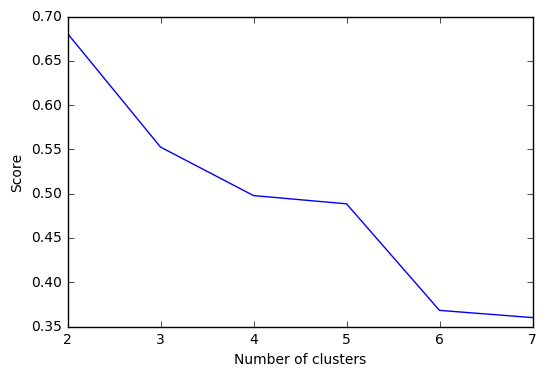

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

X = iris.values
scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k).fit(X)
    cluster_labels = km.predict(X)
    scores.append(silhouette_score(X, cluster_labels))

plt.plot(range(2 ,8), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

According to the silhouette score, the best number of clusters is 2. How could we visually check that?

## Dimensionality reduction with PCA

The original dataset contains four features - this prevents us from plotting the dataset with all its features in a 2D chart.

One way to circumvent this obstacle is to *reduce* the number of features while trying to preserve the overall structure of the data points. One of the most common algorithms to perform this is **PCA**.

Let's use scikit-learn's implementation of PCA to reduce the number of dimensions in our dataset to two. Notice that we can use the method *fit_transform()* rather than *fit()* followed by *transform()* to obtain the resulting transformation of our dataset:

In [3]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components=2).fit_transform(X)

Now we can plot the transformed data using different colors for data points that were assigned to different clusters.

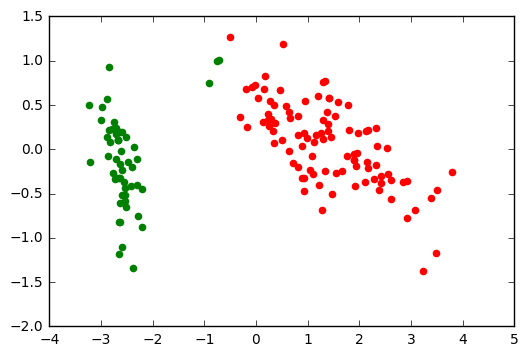

In [4]:
labels = KMeans(n_clusters=2).fit(X).predict(X)
plt.scatter(iris_pca[labels == 0, 0], iris_pca[labels == 0, 1], color='red')
plt.scatter(iris_pca[labels == 1, 0], iris_pca[labels == 1, 1], color='green')
plt.show()

PCA is not limited to visualization nor must it shrink our dataset down to two dimensions: it can be used to reduce the number of features in huge datasets to a reasonable dimension and make them more tractable for machine learning models.